## Question 1: How can you create a Bokeh plot using Python code?
---

In [5]:
pip install bokeh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
from bokeh.plotting import figure , show 
from bokeh.io import output_notebook

output_notebook()
p=figure(title='scatter plot example' , x_axis_label='x' , y_axis_label='y')

p.circle(x=[1,2,3,4,5] , y=[2,5,8,4,6] , size=10 , color='blue') 


show(p)

![Image](bokeh_plot.png)


## Question 2 : What are glyphs in Bokeh, and how can you add them to a Bokeh plot? Explain with an example.
---

Glyphs in Bokeh are visual markers or symbols used to represent data on a plot. They can be used to create various types of visual elements such as circles, squares, lines, bars, and more. Glyphs provide a flexible and customizable way to visualize data points or patterns.

To add glyphs to a Bokeh plot, you can use the glyph methods provided by the figure object. Here's an example:

In [14]:
from bokeh.plotting import figure , show 
p=figure()
p.circle(x=[1,2,3,4,5] , y=[2,5,8,4,6] , size=10 , color='blue')
p.line(x=[1,2,3,4,5], y=[2,5,8,4,6] , line_width=2 , color='red')
show(p)

![bokeh_plot (1).png](<attachment:bokeh_plot (1).png>)
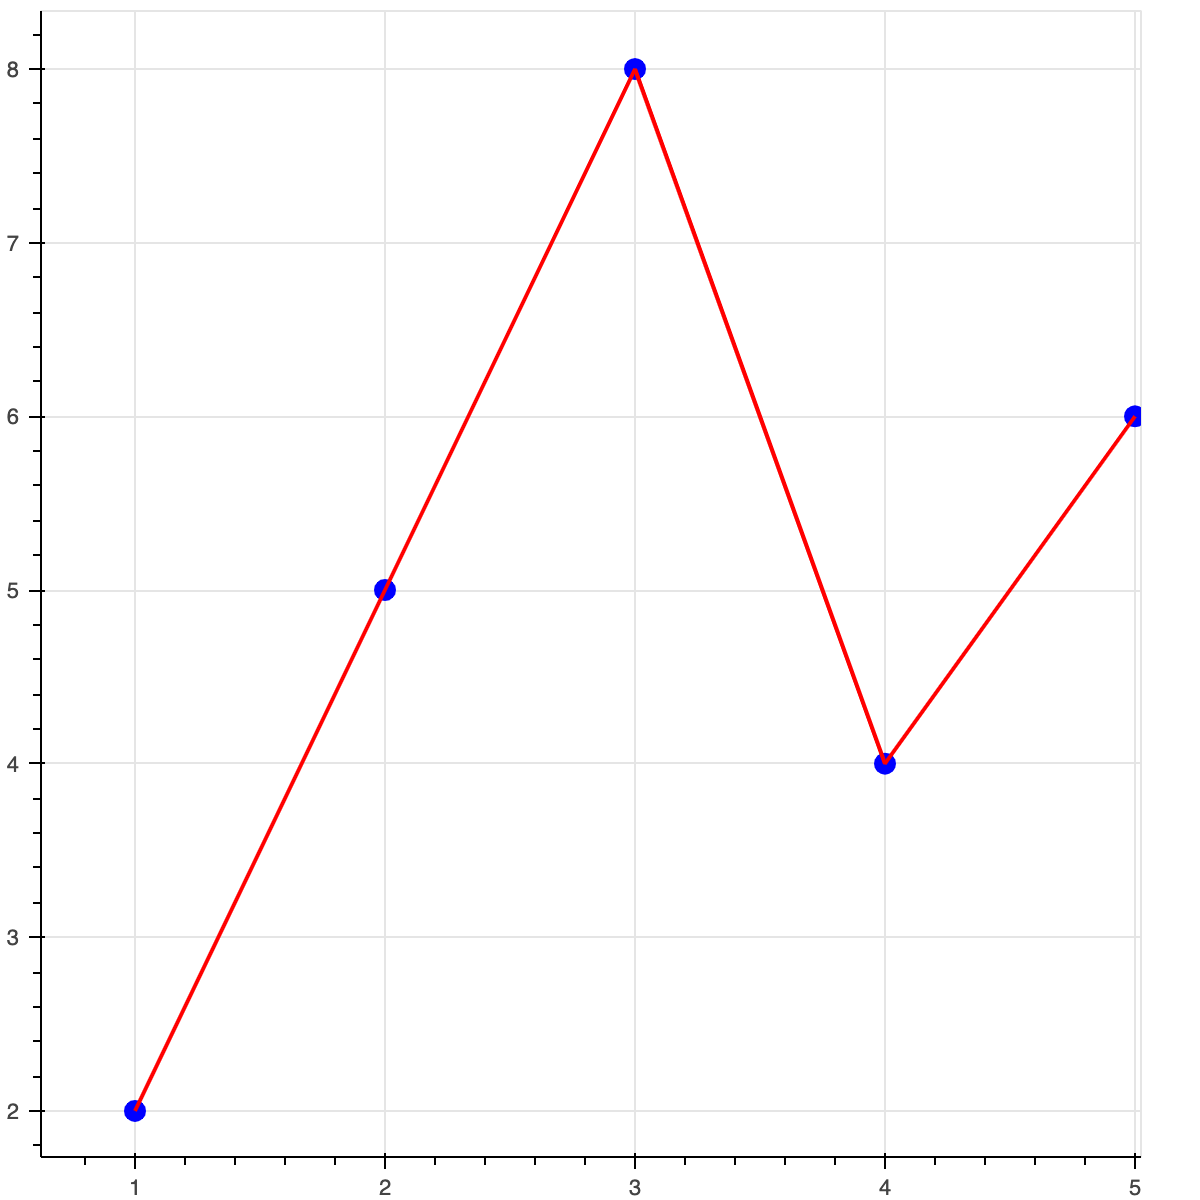

## Qurstion 3 : How can you customize the appearance of a Bokeh plot, including the axes, title, and legend?
---

To customize the appearance of a Bokeh plot, including the axes, title, and legend, you can modify various properties of the figure object and its components. Here's an example that demonstrates how to customize different aspects of a Bokeh plot:

In [16]:
from bokeh.plotting import figure , show 
p=figure(title='customized plot' , x_axis_label='x' , y_axis_label='y' , width=500 , height=400)

p.xaxis.axis_label_text_color='blue'
p.yaxis.axis_label_text_color='green'
p.xaxis.axis_line_width=2
p.yaxis.axis_line_width=2
p.title.text_font_size='18pt'
p.title.align='center'
p.title.text_color='purple'
p.circle(x=[1,2,3,4,5] , y=[2,5,8,4,6] , size=10 , color='blue' , legend_label='data')
p.legend.title='legend'
p.legend.label_text_font_style='italic'
show(p)

![bokeh_plot (2).png](<attachment:bokeh_plot (2).png>)
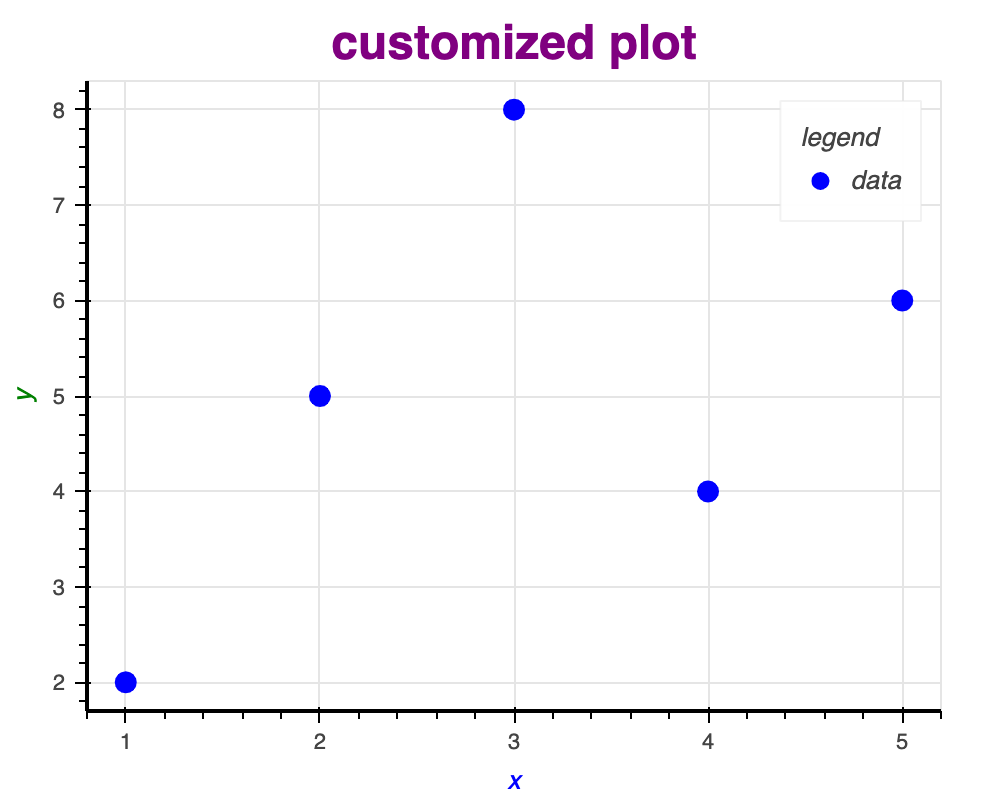

## Question 4 : What is a Bokeh server, and how can you use it to create interactive plots that can be updated in real time?
---

A Bokeh server is a Python server application that allows you to create and deploy interactive Bokeh plots that can be updated in real time. It provides a way to build web applications with dynamic and interactive visualizations that respond to user interactions or external events.

By using the Bokeh server, you can create plots that have interactive elements like sliders, buttons, dropdowns, or text inputs. These elements can trigger events or callbacks in the server code, allowing you to update the plot dynamically based on user input or changing data.

To use the Bokeh server, you need to follow these steps:

1.) Import the necessary modules:

In [17]:
from bokeh.plotting import figure , curdoc 
from bokeh.models import Slider
from bokeh.layouts import column 

2.) Create a figure object and add glyphs to it:

In [18]:
p=figure()
p.circle(x=[1,2,3] , y=[4,5,6])

GlyphRenderer(id='2436', ...)

3.) Define a callback function that will be triggered by user interactions:

In [19]:
def update_plot(attr,old,new):
  pass

4.) Create interactive elements (e.g., sliders) and associate them with the callback function:

In [20]:
slider=Slider(start=0,end=10,value=5,step=0.1,title='Slider')
slider.on_change('value' , update_plot)

5.) Arrange the interactive elements and the plot in a layout :

In [21]:
layout=column(slider ,p )

6.) Create a Bokeh document (curdoc) and add the layout to it:

In [22]:
curdoc().add_root(layout)

7.) Run the Bokeh server to start the application:

In [24]:
bokeh serve --show your_script.py

In [24]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook, push_notebook
from ipywidgets import interact
import numpy as np

output_notebook()

x = np.linspace(0, 2*np.pi, 200)
y = np.sin(x)

p = figure(title="Interactive plot")
r = p.line(x, y)

def update(frequency=1):
    r.data_source.data['y'] = np.sin(frequency * x)
    push_notebook()

show(p, notebook_handle=True)

interact(update, frequency=(1, 10))

interactive(children=(IntSlider(value=1, description='frequency', max=10, min=1), Output()), _dom_classes=('wi…

<function __main__.update(frequency=1)>

![bokeh_plot (3).png](<attachment:bokeh_plot (3).png>)
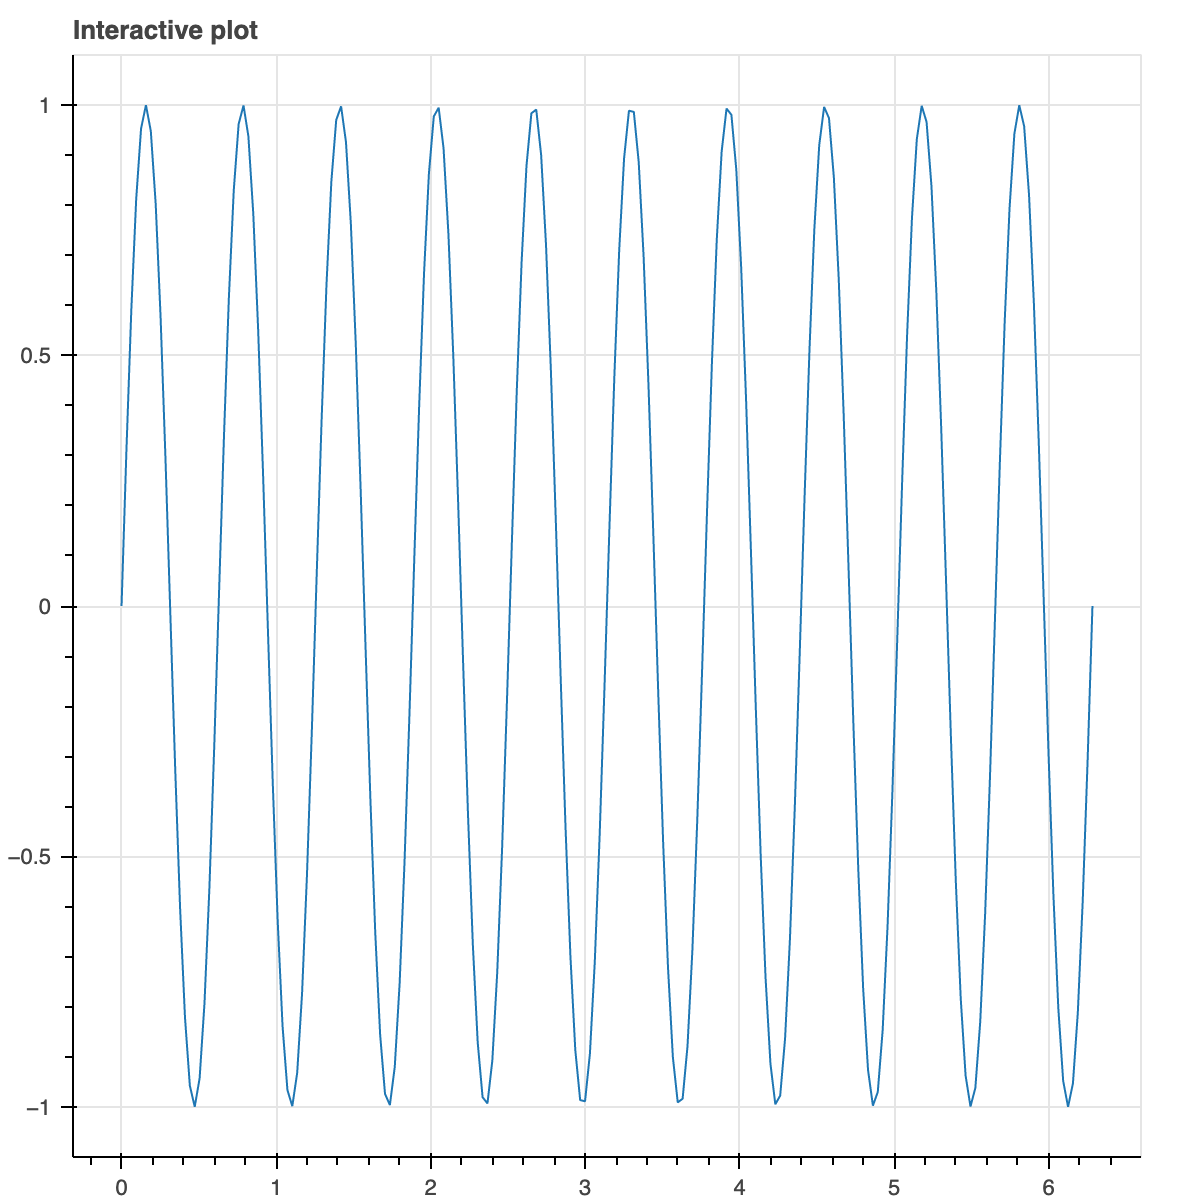

In this example, the update_plot function is called whenever the value of the slider changes. Inside the function, you can modify the plot based on the new input values.

By running the Bokeh server, you can access the interactive plot in a web browser. The plot will respond to user interactions, and any changes made to the plot will be updated in real time.

Using the Bokeh server, you can build dynamic and interactive web applications that allow users to explore and interact with data visualizations in real time.

## Question 5 : How can you embed a Bokeh plot into a web page or dashboard using Flask or Django?
---

In [ ]:
from flask import Flask, render_template
from bokeh.plotting import figure
from bokeh.embed import components

app = Flask(__name__)

@app.route("/")
def index():
    # Create a Bokeh plot
    p = figure()
    p.circle([1, 2, 3], [4, 5, 6])

    # Get the script and div tags for the plot
    script, div = components(p)

    # Render the template with the script and div tags
    return render_template("index.html", script=script, div=div)

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
<!doctype html>
<html>
  <head>
    <title>Bokeh Plot</title>
    {{ script|safe }}
  </head>
  <body>
    <h1>My Bokeh Plot</h1>
    {{ div|safe }}
  </body>
</html>

To embed a Bokeh plot into a web page or dashboard using Flask or Django, you can use the components function provided by the bokeh.embed module. The components function returns the script and div tags that are needed to embed a Bokeh plot in an HTML document.

Here is an example of how to embed a Bokeh plot into a Flask web page:

In this example, we define a Flask application with a single route that returns a rendered HTML template. Inside the route, we create a Bokeh plot, and use the components function to get the script and div tags for the plot. We then pass the script and div tags to the HTML template using the render_template function.

Here is the corresponding HTML template:

In the HTML template, we include the script tag for the Bokeh plot using the {{ script|safe }} template variable, and include the div tag for the plot using the {{ div|safe }} template variable.

To embed a Bokeh plot into a Django web page, you can follow a similar approach using Django's template system.